# Classification1 (SGD、Linear SVM、Kernel-approximation、Kernel SVM、K-Neighbors)

### データ量が十分で線形モデルの場合　→　SGD
### データ量が十分で線形モデルかつマージンを最大化したい(汎化性を上げたい)場合　→　Linear SVM
### データ量が十分で非線形モデルの場合　→　Kernel-approximation
### データ量が十分で非線形モデルかつマージンを最大化したい(汎化性を上げたい)場合　→  Kernel SVM
### 非線形でノンパラメトリックな手法を試したい　→  K-Neighbors

### 参考 :  
SGD : http://neuro-educator.com/mlearn1/  
Linear SVM : http://neuro-educator.com/ml3/  
Kernel-approximation : http://neuro-educator.com/ml2/  
SVM : http://neuro-educator.com/ml5/  
K-Neighbors : http://neuro-educator.com/ml4/

---

In [1]:
# 1：ライブラリのインポート
import numpy as np #numpyという行列などを扱うライブラリを利用
import pandas as pd #pandasというデータ分析ライブラリを利用
import matplotlib.pyplot as plt #プロット用のライブラリを利用
from sklearn import linear_model, metrics, preprocessing, svm, cross_validation, neighbors #機械学習用のライブラリを利用
from mlxtend.plotting import plot_decision_regions #学習結果をプロットする外部ライブラリを利用

# jupyter notebookでmatplotを表示するために必要
%matplotlib inline 

/Users/mitsuhiro/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/mitsuhiro/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/mitsuhiro/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/mitsuhiro/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from tha

---

# Stochastic Gradient Descent(SGD)　確率的勾配降下法

目標: 「ワイン178本のデータを使用し、未知のワインの色とプロリン（アミノ酸の一種）の量の2変数から、その未知のワインが3つのブドウ品種のどれから作られたのかを分類する」

SGDについてはこちら
https://www.slideshare.net/kisa12012/sgd-future-best-27314417

In [2]:
#　2：Wineのデータセットを読み込む--------------------------------
df_wine_all=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
#品種(0列、1～3)と色（10列）とプロリンの量(13列)を使用する
df_wine=df_wine_all[[0,10,13]]
df_wine.columns = [u'class', u'color', u'proline']
pd.DataFrame(df_wine)  #この行を実行するとデータが見れる

,class,color,proline
0,1,5.640000,1065
1,1,4.380000,1050
2,1,5.680000,1185
3,1,7.800000,1480
4,1,4.320000,735
5,1,6.750000,1450
6,1,5.250000,1290
7,1,5.050000,1295
8,1,5.200000,1045
9,1,7.220000,1045


<function matplotlib.pyplot.show>

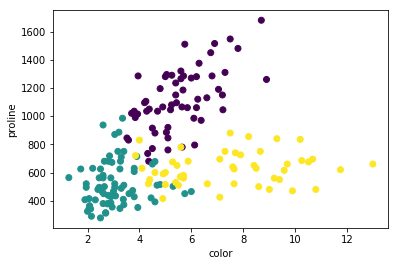

In [3]:
# 3：プロットしてみる------------------------------------------------------
x=df_wine["color"]
y=df_wine["proline"]
z=df_wine["class"]-1

plt.scatter(x,y, c=z)
plt.xlabel("color")
plt.ylabel("proline")
plt.show

In [4]:
#4：データの整形-------------------------------------------------------
X=df_wine[["color","proline"]]
sc=preprocessing.StandardScaler()
sc.fit(X)
X_std=sc.transform(X) # 標準化した

In [5]:
#5：機械学習で分類する
clf_result=linear_model.SGDClassifier(loss="hinge") #loss="hinge" 線形分離のSGDを用いたClassifier

詳しい使い方はこちら  
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier

In [6]:
#解説 6：K分割交差検証（cross validation）で性能を評価する---------------------
scores=cross_validation.cross_val_score(clf_result, X_std, z, cv=10)
print("平均正解率 = ", scores.mean())
print("正解率の標準偏差 = ", scores.std())

平均正解率 =  0.8727726178190576
正解率の標準偏差 =  0.11883360038029209


/Users/mitsuhiro/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/mitsuhiro/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 

In [7]:
#7：トレーニングデータとテストデータに分けて実行してみる------------------
X_train, X_test, train_label, test_label=cross_validation.train_test_split(X_std,z, test_size=0.1, random_state=0)
clf_result.fit(X_train, train_label)
#正答率を求める
pre=clf_result.predict(X_test)
ac_score=metrics.accuracy_score(test_label,pre)
print("正答率 = ",ac_score)
#8: plotする
X_train_plot=np.vstack(X_train)
train_label_plot=np.hstack(train_label)
X_test_plot=np.vstack(X_test)
test_label_plot=np.hstack(test_label)

正答率 =  0.8333333333333334


/Users/mitsuhiro/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


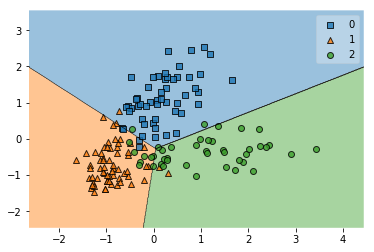

In [8]:
plot_decision_regions(X_train_plot, train_label_plot, clf=clf_result, res=0.01) #学習データをプロット

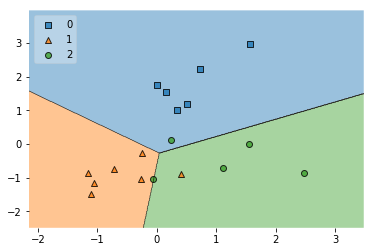

In [9]:
plot_decision_regions(X_test_plot, test_label_plot, clf=clf_result, res=0.01, legend=2) #テストデータをプロット

In [10]:
# 9：識別平面の式を手に入れる--------------------------------
print(clf_result.intercept_)
print(clf_result.coef_ )  #coef[0]*x+coef[1]*y+intercept=0

[ -3.87953039 -11.43478796 -14.96641884]
[[  0.86562087  18.14400268]
 [-26.18962409 -14.00374911]
 [ 20.26076952 -19.61700332]]


----

# Linear SVM

目標は先ほど同じ: 「ワイン178本のデータを使用し、未知のワインの色とプロリン（アミノ酸の一種）の量の2変数から、その未知のワインが3つのブドウ品種のどれから作られたのかを分類する」

SVMについてはこちら  
http://www.sist.ac.jp/~kanakubo/research/neuro/supportvectormachine.html  
学習は先ほどSGDと同じhinge関数の最小化とmarginが最大化  
hinge関数が最小化だけだとデータ点ギリギリに境界線が引かれてしまい汎化性が考慮されない

In [11]:
#1：機械学習で分類する---------------------------------------------------
clf_result=svm.LinearSVC(loss='hinge', C=1.0,class_weight='balanced', random_state=0)#loss='squared_hinge' #loss="hinge", loss="log"
clf_result.fit(X_std, z)

LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=0, tol=0.0001, verbose=0)

In [12]:
# 2：K分割交差検証（cross validation）で性能を評価する---------------------
scores=cross_validation.cross_val_score(clf_result, X_std, z, cv=10)
print("平均正解率 = ", scores.mean())
print("正解率の標準偏差 = ", scores.std())

平均正解率 =  0.8897316821465429
正解率の標準偏差 =  0.08067180853242613


詳しい使い方はこちら  
http://scikit-learn.org/stable/modules/svm.html#classification

In [13]:
# 3：トレーニングデータとテストデータに分けて実行してみる------------------
X_train, X_test, train_label, test_label=cross_validation.train_test_split(X_std,z, test_size=0.1, random_state=0)
clf_result.fit(X_train, train_label)
#正答率を求める
pre=clf_result.predict(X_test)
ac_score=metrics.accuracy_score(test_label,pre)
print("正答率 = ",ac_score)

正答率 =  0.9444444444444444


[-0.75358192 -1.42398486 -0.78174612]
[[-0.17679789  2.02131409]
 [-2.49012066 -1.14713855]
 [ 1.84955225 -1.20466709]]


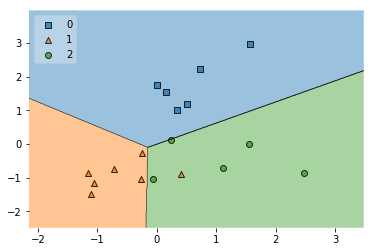

In [14]:
# 4:plotする
X_train_plot=np.vstack(X_train)
train_label_plot=np.hstack(train_label)
X_test_plot=np.vstack(X_test)
test_label_plot=np.hstack(test_label)
#plot_decision_regions(X_train_plot, train_label_plot, clf=clf_result, res=0.01) #学習データをプロット
plot_decision_regions(X_test_plot, test_label_plot, clf=clf_result, res=0.01, legend=2) #テストデータをプロット
 
# 5：任意のデータに対する識別結果を見てみる------------------
#predicted_label=clf_result.predict([1,-1])
#print("このテストデータのラベル = ", predicted_label)
 
# 6：識別平面の式を手に入れる--------------------------------
print(clf_result.intercept_)
print(clf_result.coef_ )  #coef[0]*x+coef[1]*y+intercept=0

---

# Kernel-approximation（カーネル近似）

Kernel-approximationについてはこちら  
https://www.slideshare.net/ShinyaShimizu/ss-11623505  
https://www.slideshare.net/KeisukeSugawara/slide0629  
イメージ的には非線形項を近似的に作り、それを使ってSGDClassifierする

目標: SGDではうまくいかないXORのデータをkernel-approximation（カーネル近似）を用いて分類する

In [15]:
# 1：XORのデータを作成する(x=正、y=正)=0,(x=正、y=負)=1, 的な--------------
np.random.seed(0)
X_xor=np.random.randn(200,2) 
y_xor=np.logical_xor(X_xor[:,0]>0, X_xor[:,1]>0)
y_xor=np.where(y_xor,1,0)
pd.DataFrame(y_xor)  #この行を実行するとデータが見れる

,0
0,0
1,0
2,1
3,1
4,1
5,0
6,0
7,0
8,1
9,1


<function matplotlib.pyplot.show>

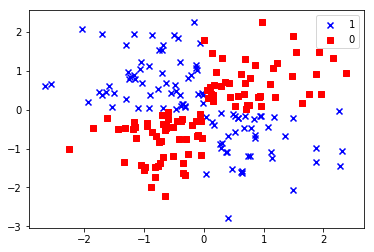

In [16]:
# 2：プロットしてみる-
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==0, 0], X_xor[y_xor==0, 1], c='r', marker='s', label='0')
plt.legend(loc='best')
plt.show

In [17]:
# 3：データの整形-------------------------------------------------------
X_std=X_xor
z=y_xor

まずは先ほどと同様にSGD(linear)で試してみる

正答率 =  0.45


/Users/mitsuhiro/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/mitsuhiro/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 

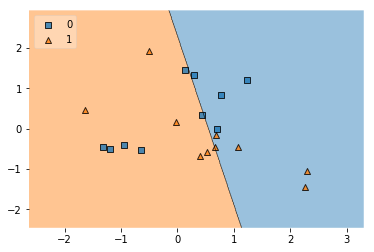

In [18]:
clf_result=linear_model.SGDClassifier(loss="hinge") #loss="hinge", loss="log"
clf_result.fit(X_std, z)
scores=cross_validation.cross_val_score(clf_result, X_std, z, cv=10)
#トレーニングデータとテストデータに分けて実行してみる------------------
X_train, X_test, train_label, test_label=cross_validation.train_test_split(X_std,z, test_size=0.1, random_state=0)
clf_result.fit(X_train, train_label)
#正答率を求める
pre=clf_result.predict(X_test)
ac_score=metrics.accuracy_score(test_label,pre)
print("正答率 = ",ac_score)
#plotする
X_train_plot=np.vstack(X_train)
train_label_plot=np.hstack(train_label)
X_test_plot=np.vstack(X_test)
test_label_plot=np.hstack(test_label)
#plot_decision_regions(X_train_plot, train_label_plot, clf=clf_result, res=0.01) #学習データをプロット
plot_decision_regions(X_test_plot, test_label_plot, clf=clf_result, res=0.01, legend=2) #テストデータをプロット

次にkernel approximationを試す

In [19]:
from sklearn.kernel_approximation import RBFSampler #カーネル近似用の関数
from matplotlib.colors import ListedColormap #plot用

In [20]:
# 5：カーネル近似を適用する------------------------------------------
rbf_feature = RBFSampler(gamma=1, n_components=100, random_state=1)
X_std = rbf_feature.fit_transform(X_std)

print("X_stdの大きさ ",pd.DataFrame(X_std).shape)

X_stdの大きさ  (200, 100)


ここではRBFカーネル(ガウシアンカーネル)を使用
詳しい使い方はこちら  
http://scikit-learn.org/stable/modules/kernel_approximation.html

指定した次元までの積を構成するものもある (sklearn.preprocessing.PolynomialFeatures)
http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [21]:
# 6：機械学習で分類する---------------------------------------------------
clf_result=linear_model.SGDClassifier(loss="hinge") #loss="hinge""
 
# 7：K分割交差検証（cross validation）で性能を評価する---------------------
scores=cross_validation.cross_val_score(clf_result, X_std, z, cv=10)
print("平均正解率 = ", scores.mean())
print("正解率の標準偏差 = ", scores.std())

平均正解率 =  0.8959022556390976
正解率の標準偏差 =  0.07539866156697955


/Users/mitsuhiro/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/mitsuhiro/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 

In [22]:
# 8：トレーニングデータとテストデータに分けて実行してみる------------------
X_train, X_test, train_label, test_label=cross_validation.train_test_split(X_std,z, test_size=0.1, random_state=1)
clf_result.fit(X_train, train_label)
#正答率を求める
pre=clf_result.predict(X_test)
ac_score=metrics.accuracy_score(test_label,pre)
print("正答率 = ",ac_score)

正答率 =  0.8


/Users/mitsuhiro/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


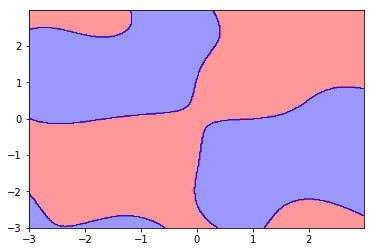

In [23]:
# 解説 9：Plotする
x1_min, x1_max, x2_min, x2_max=-3, 3, -3, 3
resolution=0.02
xx1, xx2=np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
X=(np.array([xx1.ravel(), xx2.ravel()]).T)
plot_z=clf_result.predict(rbf_feature.fit_transform(X))
colors=('red','blue')
cmap=ListedColormap(colors[:len(np.unique(plot_z))])
plot_z=plot_z.reshape(xx1.shape)
plt.contourf(xx1,xx2, plot_z, alpha=0.4, cmap=cmap)

----

# Kernel SVM

カーネル法　（rbf） + マージン最大化

詳しい使い方はこちら  
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

目標: 線形ではうまくいかないXORのデータをSVMを用いて分類する

In [24]:
clf_result=svm.SVC(gamma=0.001, C=100.) #gamma : Kernel coefficient for ‘rbf   C : Penalty parameter C of the error term.
clf_result.fit(X_std, z)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
# ：K分割交差検証（cross validation）で性能を評価する---------------------
scores=cross_validation.cross_val_score(clf_result, X_std, z, cv=10)
print("平均正解率 = ", scores.mean())
print("正解率の標準偏差 = ", scores.std())

平均正解率 =  0.930451127819549
正解率の標準偏差 =  0.049807419278729864


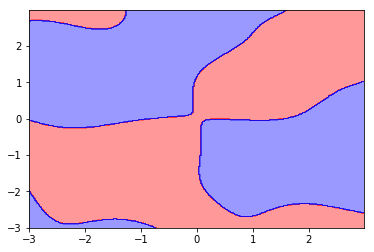

In [26]:
# ：Plotする
x1_min, x1_max, x2_min, x2_max=-3, 3, -3, 3
resolution=0.02
xx1, xx2=np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
X=(np.array([xx1.ravel(), xx2.ravel()]).T)
plot_z=clf_result.predict(rbf_feature.fit_transform(X))
colors=('red','blue')
cmap=ListedColormap(colors[:len(np.unique(plot_z))])
plot_z=plot_z.reshape(xx1.shape)
plt.contourf(xx1,xx2, plot_z, alpha=0.4, cmap=cmap)

---

# K-Neighbors

式を生成しない、ノンパラパラメトリックモデル  
識別したいデータ点から、距離が近いK点の学習データを探し、K点のうち一番ラベルが多かったクラスを識別結果とする  
そのため、新たな点を分類したい場合、学習データすべてと距離を計算する必要がある  
多くの機械学習では、学習に時間がかかっても識別は一瞬でできるが、K近傍法では識別に時間がかかるという欠点がある  

目標: 線形ではうまくいかないXORのデータをSVMを用いて分類する

In [27]:
# 1：データの整形-------------------------------------------------------
X_std=X_xor
z=y_xor

In [28]:
# 2：機械学習で分類する---------------------------------------------------
n_neighbors = 5
clf_result=neighbors.KNeighborsClassifier(n_neighbors, weights = 'distance') #weights = 'uniform'

識別したい点から何点の近傍を考慮するのかを、n_neighbors = 5で設定
またweightsは近傍にあった5点を評価するさいに、’uiform’だと点までの距離を考慮しない
一方weightsを’distance’にすると距離も考慮して、分類を決定
詳しい使い方はこちら  
http://scikit-learn.org/stable/modules/neighbors.html

In [29]:
# 2：K分割交差検証（cross validation）で性能を評価する---------------------
scores=cross_validation.cross_val_score(clf_result, X_std, z, cv=10)
print("平均正解率 = ", scores.mean())
print("正解率の標準偏差 = ", scores.std())

平均正解率 =  0.9499749373433584
正解率の標準偏差 =  0.03164267349739748


正答率 =  0.9


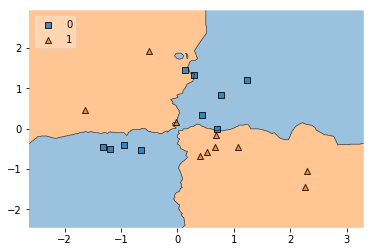

In [30]:
# 3：トレーニングデータとテストデータに分けて実行してみる------------------
X_train, X_test, train_label, test_label=cross_validation.train_test_split(X_std,z, test_size=0.1, random_state=0)
clf_result.fit(X_train, train_label)
#正答率を求める
pre=clf_result.predict(X_test)
ac_score=metrics.accuracy_score(test_label,pre)
print("正答率 = ",ac_score)
#plotする
X_train_plot=np.vstack(X_train)
train_label_plot=np.hstack(train_label)
X_test_plot=np.vstack(X_test)
test_label_plot=np.hstack(test_label)
# plot_decision_regions(X_train_plot, train_label_plot, clf=clf_result, res=0.01) #学習データをプロット
plot_decision_regions(X_test_plot, test_label_plot, clf=clf_result, res=0.01, legend=2) #テストデータをプロット
 